In [90]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # create a subfolder under images
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



# ML project checklist
## 1. Frame the problem and look at the big picture
## 2. [Get the data](#Get_the_data)
## 3. [Visualization](#Visualization)


<a id='Get_the_data'></a>

## 2. Get the data
### Load data. 
Write a function to retrieve data and creat subfolder for dataset, figures etc  
- `os.path.isdir` `os.makedirs` `os.path.join`
- `urllib.request.urlretrieve`
- `tarfile.open`

### Take a quick look at the data structure
#### Data check: use entire dataset
Check attributes: data type, any missing value, distribution. 
- `.info()` `.value_counts()`(for categorical variable) `.describe()` `.hist()`

List potential data issues and find solutions. For ML algorithoms to better detect patterns, check:
- Is data tail-heavy? If so, need to transform data to more bell-shaped 
- Are all data in the same scale? If not, need to rescale them 
- Any data being capped? If so, may need to drop or relabel them 
- Figure out the unit of data and understand them

#### Prepare data for visualization: use test set
To avoid *data snooping bias*, carve out a set as test set, don't look at it at all. `sklearn.model_selection.train_test_split()` 
- Make sure it doesn't generate a new test set if you the program again. Solution: specify `random_state`; Give an unique ID to each instance and compute its hash (skip for now, see p 53).

To avoid *sampling bias*, we need to make sure to sample in a way that test set is representative of entire dataset.
- Stratified sampling instead of random sampling(dataset is big in relative to the number of attributes) `sklearn.model_selection.StratifiedShuffedSplit()`

### Load data

In [5]:
import os
import tarfile # decompress file
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    ## create a path if not existed
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path) # retrieve dataset using url
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
fetch_housing_data()

In [9]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### Take a quick look at the data structure


In [10]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [17]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Saving figure attribute_histogram_plots


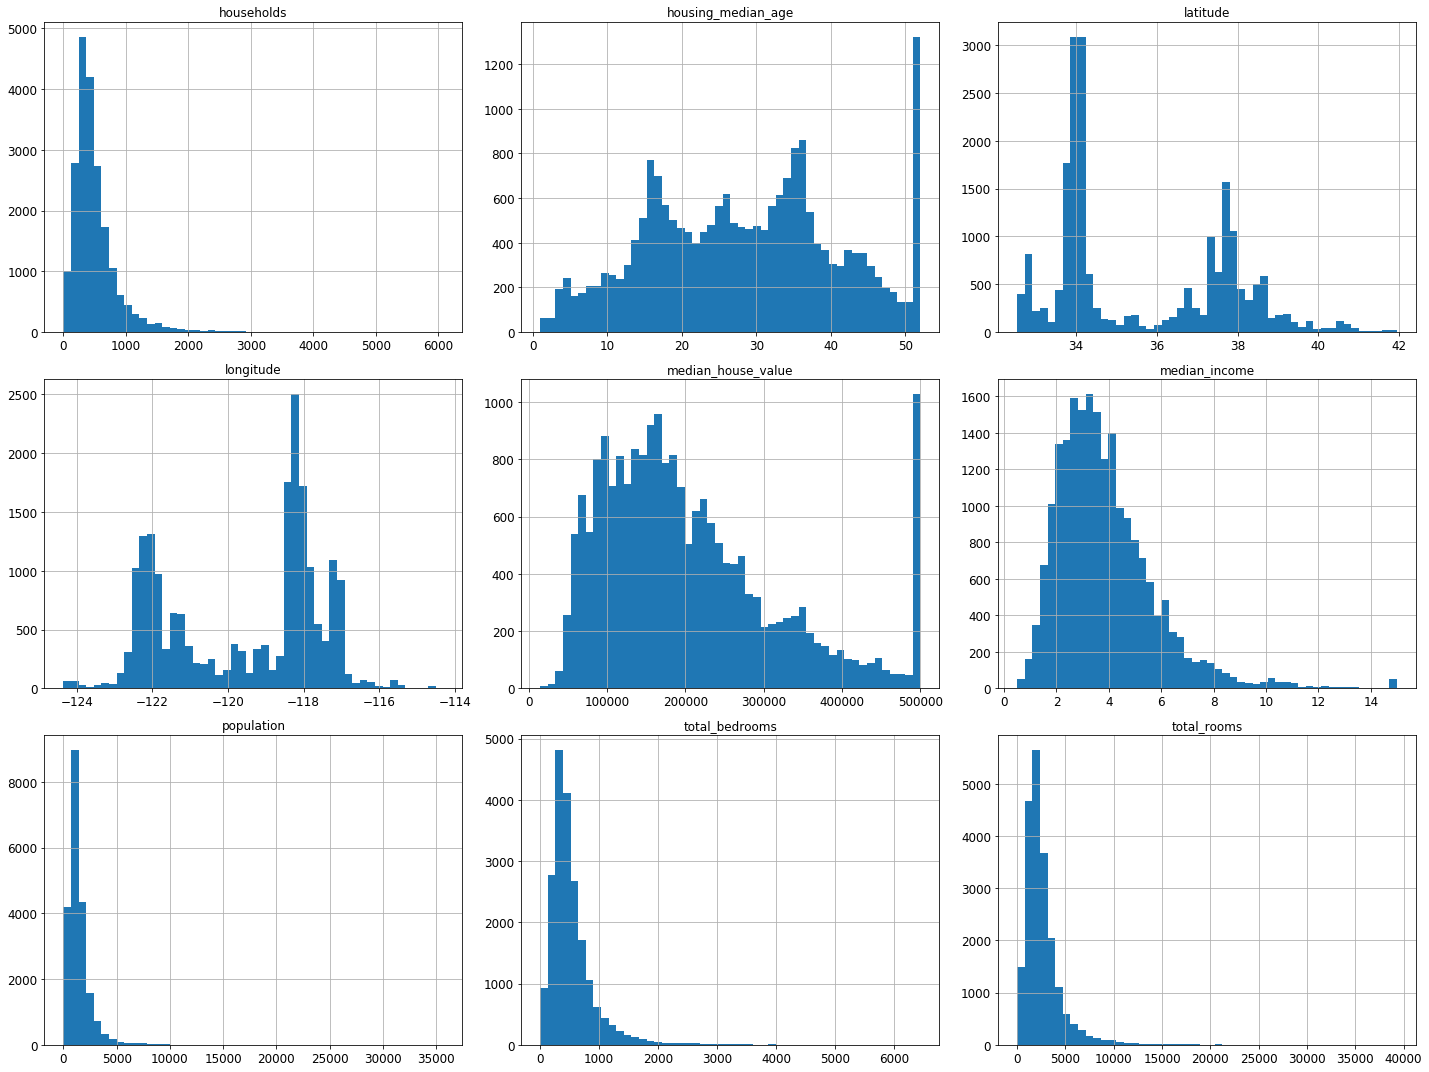

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots") # predefined save fig function
plt.show()

### random sampling


In [19]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [20]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [23]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
len(train_set)

16512

### stratified sampling

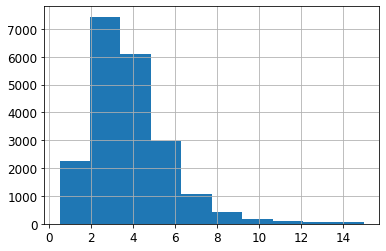

In [31]:
housing["median_income"].hist()

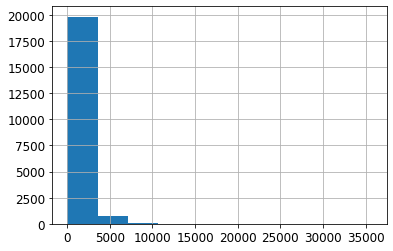

In [56]:
housing['population'].hist()

In [57]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["population_cat"] = pd.cut(housing["population"],
                               bins=[0., 1000, 2000, 3000, 4000, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [33]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

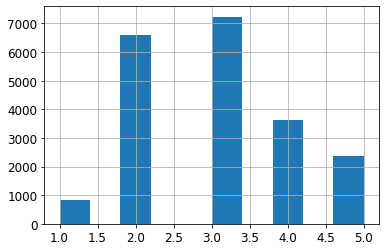

In [34]:
housing["income_cat"].hist()

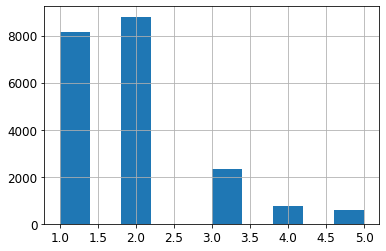

In [59]:
housing['population_cat'].hist()

In [85]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

housing['total_cat']=[str(housing['income_cat'].iloc[x])+str(housing['population_cat'].iloc[x]) for x in range(len(housing))]
## sampling via income_cat & population_cat distribution
for train_index, test_index in split.split(housing, housing["total_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [87]:
def income_cat_proportions(data):
    return data["total_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [88]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
11,0.020543,0.020591,0.020107,-2.122642,0.235849
12,0.014777,0.014777,0.014777,0.000000,0.000000
13,0.003198,0.003149,0.004118,28.787879,-1.515152
14,0.001017,0.000969,0.000969,-4.761905,-4.761905
15,0.000291,0.000242,0.000242,-16.666667,-16.666667
21,0.122723,0.122578,0.129360,5.408606,-0.118437
22,0.138614,0.138566,0.137112,-1.083537,-0.034953
23,0.038130,0.038033,0.038760,1.651842,-0.254130
24,0.011579,0.011628,0.011628,0.418410,0.418410
25,0.007800,0.007752,0.007510,-3.726708,-0.621118


<a id='Get_the_data'></a>

## 3.Visualization
- Use training set only.  If training set is big, sample an exploration set to make manipulations easy and fast

Saving figure better_visualization_plot


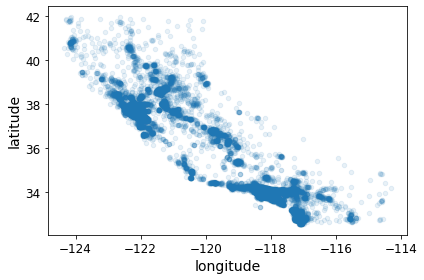

In [95]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

In [97]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,population_cat,total_cat
18244,-122.08,37.39,44.0,1498.0,430.0,848.0,400.0,2.8438,307100.0,NEAR BAY,2,1,21
15083,-116.96,32.80,19.0,4574.0,1152.0,3045.0,1057.0,2.0650,124100.0,<1H OCEAN,2,4,24
5446,-118.44,34.00,41.0,1562.0,377.0,874.0,368.0,4.1083,324300.0,<1H OCEAN,3,1,31
17307,-119.57,34.38,22.0,2512.0,426.0,919.0,341.0,5.7590,425000.0,<1H OCEAN,4,1,41
7315,-118.19,33.97,34.0,2700.0,763.0,2815.0,767.0,2.4196,178400.0,<1H OCEAN,2,3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8065,-118.17,33.83,45.0,1808.0,315.0,800.0,302.0,4.8693,277700.0,NEAR OCEAN,4,1,41
13319,-117.64,34.07,52.0,1644.0,372.0,1269.0,355.0,2.6913,108300.0,INLAND,2,2,22
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964,112500.0,INLAND,2,1,21
10494,-117.69,33.47,13.0,2020.0,378.0,679.0,290.0,5.7560,305600.0,<1H OCEAN,4,1,41


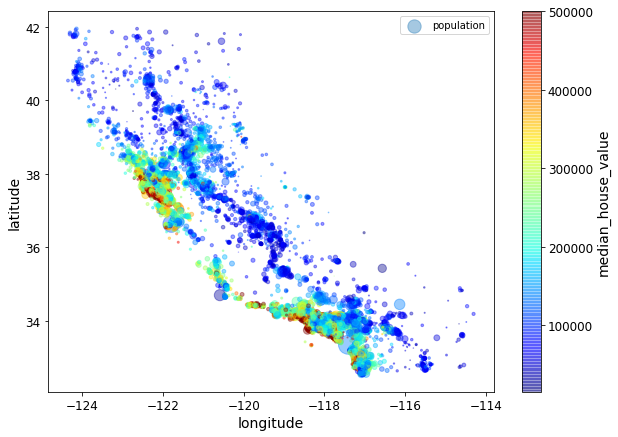

In [99]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
#save_fig("housing_prices_scatterplot")